In [ ]:
# svm knn algorithm

In [1]:
# import the basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('BreastCancer.csv')

In [3]:
df=data.copy()
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [5]:
df['Bare.nuclei']=df['Bare.nuclei'].fillna(df['Bare.nuclei'].mean())


In [6]:
df.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [7]:
X=df.drop(['Id','Class'],axis=1)

In [8]:
Y=df['Class']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


In [11]:
from sklearn.svm import SVC,SVR
#svr is for regression

In [12]:
# build the model
svc_model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=False)

In [13]:
svc_model.fit(x_train,y_train)

SVC(gamma=0.01)

In [14]:
prediction=svc_model.predict(x_test)

In [15]:
#import the model evaluation

In [16]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [17]:
accuracy_score(y_test,prediction)

0.9642857142857143

In [18]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.91      0.98      0.94        42

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



In [19]:

svc_matrix=confusion_matrix(y_test,prediction)
svc_matrix

array([[94,  4],
       [ 1, 41]])

In [20]:
# kernel=linear

In [21]:
svc_model1=SVC(C=0.01,kernel='linear',gamma=0.01)
svc_model1.fit(x_train,y_train)
prediction1=svc_model1.predict(x_test)
confusion_matrix(y_test,prediction1)

array([[95,  3],
       [ 2, 40]])

In [22]:
svc_model2=SVC(C=1.0,kernel='sigmoid',gamma=0.01)
svc_model2.fit(x_train,y_train)
prediction2=svc_model2.predict(x_test)
confusion_matrix(y_test,prediction2)

array([[60, 38],
       [41,  1]])

In [23]:
svc_model3=SVC(C=0.1,kernel='poly',gamma=0.01)
svc_model3.fit(x_train,y_train)
prediction3=svc_model3.predict(x_test)
confusion_matrix(y_test,prediction3)

array([[95,  3],
       [ 2, 40]])

In [24]:
TN,FP,FN,TP=svc_matrix.ravel()
print('true negative',TN)
print('false positive',FP)
print('false negative',FN)
print('true positive',TP)

true negative 94
false positive 4
false negative 1
true positive 41


In [25]:
TN,FP,FN,TP=svc_matrix.flatten()
print('true negative',TN)
print('false positive',FP)
print('false negative',FN)
print('true positive',TP)

true negative 94
false positive 4
false negative 1
true positive 41


In [26]:
#true negative rate
specifity=TN/TN+FP
specifity

5.0

In [27]:
#recal value
sensitivity=TP/TP+FN
sensitivity

2.0

In [28]:
decision_scores = svc_model.decision_function(x_test)

In [29]:
# Apply sigmoid function to decision scores to obtain probability-like scores
prob_scores = 1 / (1 + np.exp(-decision_scores))



In [30]:
# Positive probability score
positive_prob_scores = prob_scores  # Assuming positive class is labeled as 1
#positive_prob_scores

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [47]:
auc_score=roc_auc_score(y_test,prediction)
auc_score

0.967687074829932

In [48]:
fpr,tpr,thresholds=roc_curve(y_test,positive_prob_scores,pos_label=1)

In [49]:
roc_auc1=auc(fpr,tpr)

In [50]:
print('FPR\n',fpr)
print('TPR\n',tpr)

FPR
 [0.         0.         0.01020408 0.01020408 0.02040816 0.02040816
 0.03061224 0.03061224 0.04081633 0.04081633 0.26530612 0.30612245
 0.33673469 0.43877551 0.45918367 0.5        0.53061224 0.56122449
 0.60204082 0.66326531 0.69387755 0.73469388 0.76530612 0.85714286
 0.91836735 0.96938776 1.        ]
TPR
 [0.         0.02380952 0.02380952 0.07142857 0.07142857 0.78571429
 0.78571429 0.97619048 0.97619048 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


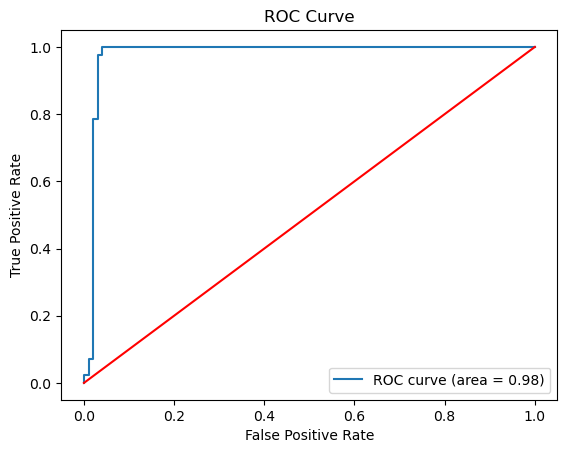

In [51]:
# plot the graph.
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1],color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# KNN approach

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn.metrics import roc_curve,auc

In [54]:
knn5=KNeighborsClassifier( p=2,
    metric='minkowski',n_neighbors=5)

In [55]:
knn5.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
y_test_predict5=knn5.predict(x_test)

In [57]:
confusion_matrix(y_test,y_test_predict5)

array([[95,  3],
       [ 1, 41]])

In [58]:
auc_score=roc_auc_score(y_test,y_test_predict5)
auc_score

0.9727891156462585

In [59]:
fpr,tpr,threshold=roc_curve(y_test,y_test_predict5)


In [60]:
roc_auc=auc(fpr,tpr)

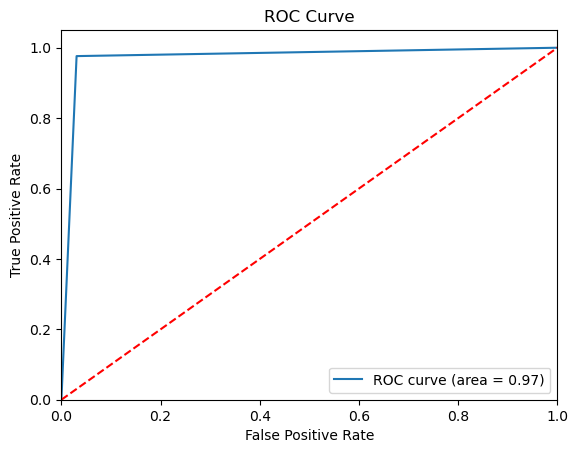

In [61]:
plt.figure()
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--',color='red')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
# find the best value of k--

Text(0, 0.5, 'calculate accuracy')

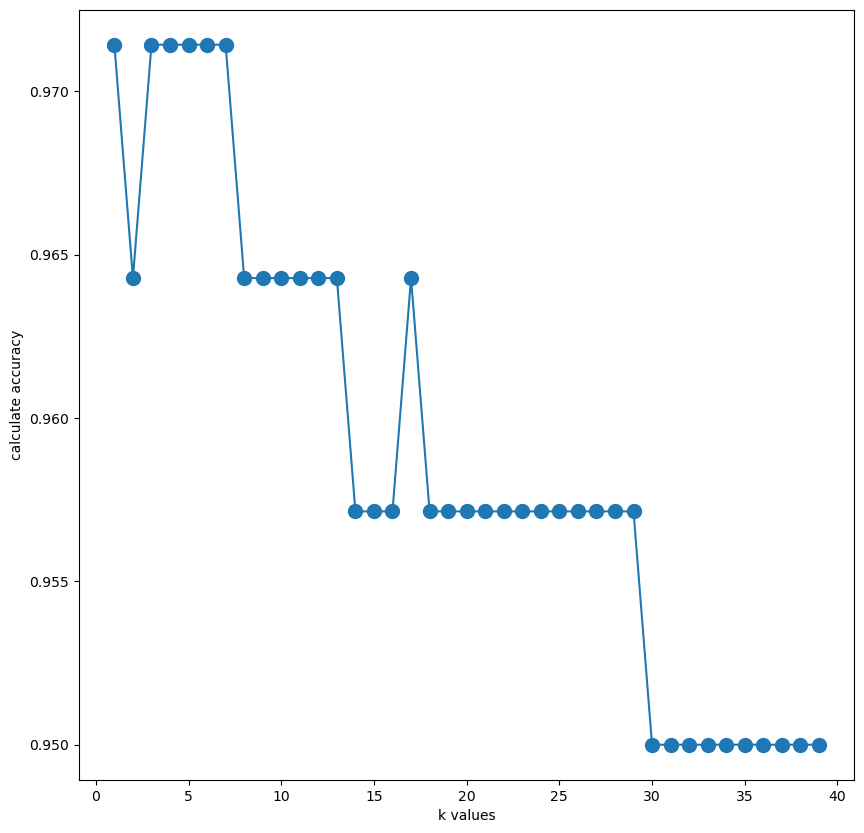

In [49]:
best_accuracy=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predict=knn.predict(x_test)
    accuracy=accuracy_score(y_test,y_predict)
    best_accuracy.append(accuracy)
    
    
plt.figure(figsize=(10,10))
plt.plot(range(1,40),best_accuracy,marker='o',markersize=10)
plt.xlabel('k values')
plt.ylabel('calculate accuracy')

# model evaluation --roc auc curve, roc_auc score
# home work calculate roc_auc score and create roc auc curve for sVM and  KNN model
# on cardiovascular dataset SVM KNN

In [ ]:
# stats test paper --50 Q will be there 
#send to email tensorflowmks@
#subject MAY 7TH WEEKEND--TEST PAPER